<a href="https://colab.research.google.com/github/singhsneha99/Feature-Engineering-HR/blob/main/Employee_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('HR.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Display summary statistics
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

Data Visualization:

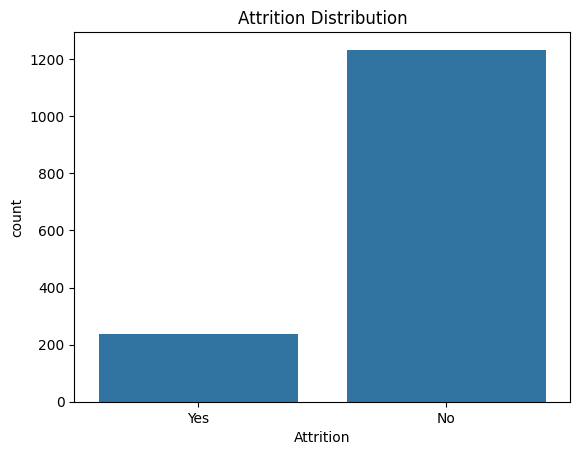

In [5]:
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()


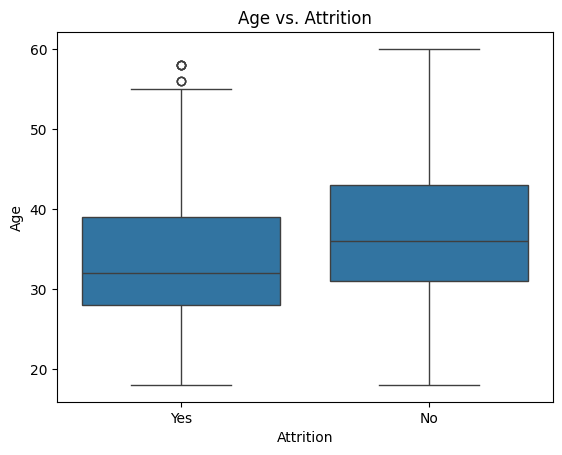

In [6]:
# Example: Boxplot of Age vs. Attrition
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age vs. Attrition')
plt.show()


<ipython-input-7-13531951a605>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


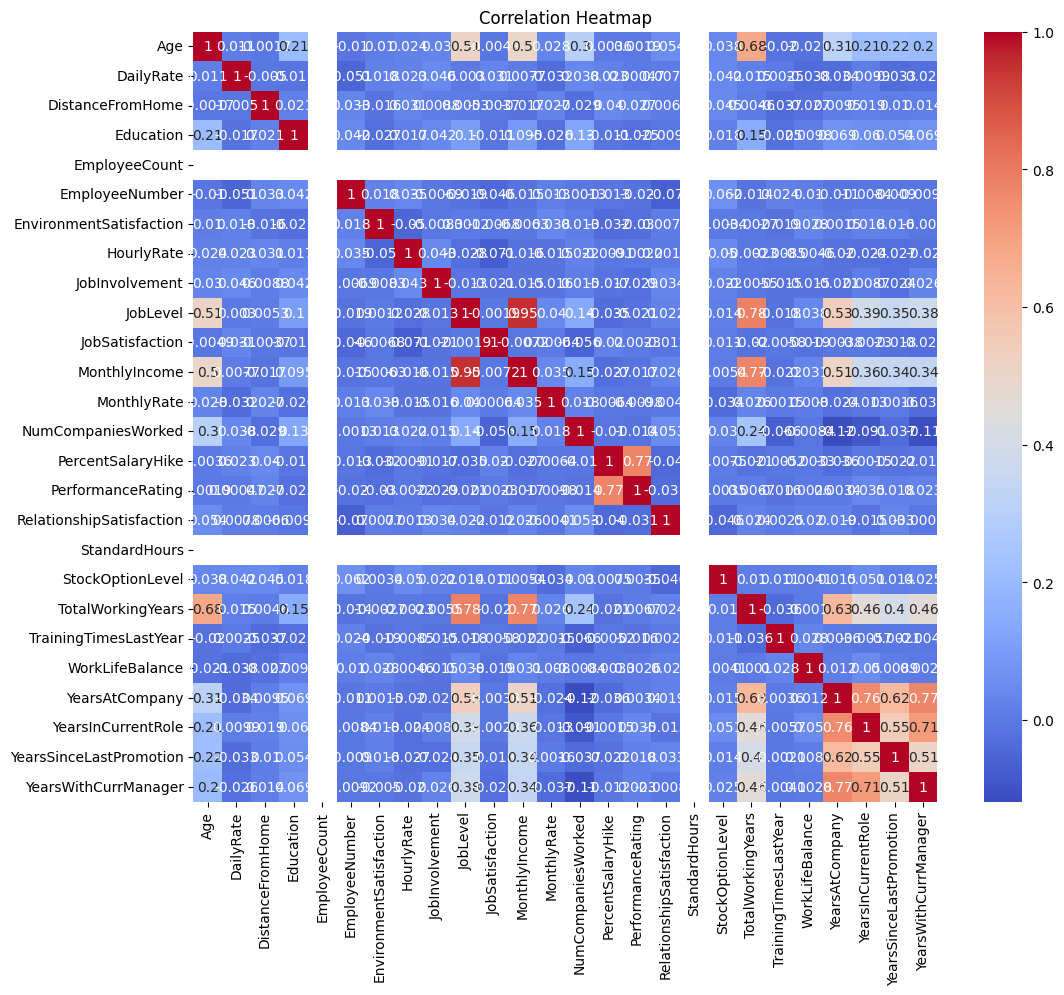

In [7]:
# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Increase figure size
plt.figure(figsize=(12, 10))

# Create heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


Feature Engineering

In [8]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Assuming df is your DataFrame

# Step 1: One-hot encode categorical variables
categorical_columns = ['BusinessTravel', 'Department', 'EducationField']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 2: Create new features
df_encoded['YearsInCurrentRoleRatio'] = df['YearsInCurrentRole'] / df['TotalWorkingYears']

# Step 3: Separate numerical and categorical columns
numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
categorical_columns_encoded = [col for col in df_encoded.columns if col not in numerical_columns]

# Step 4: Create transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Step 5: Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns_encoded)
    ],
    remainder='passthrough'  # Include any remaining columns
)

# Step 6: Create the pipeline with imputation and transformation
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

# Step 7: Fit and transform the data
df_transformed = pd.DataFrame(pipeline.fit_transform(df_encoded))

# Display the modified DataFrame
print(df_transformed.head())


         0         1         2         3    4         5         6         7   \
0  0.446350  0.742527 -1.010909 -0.891688  0.0 -1.701283 -0.660531  1.383138   
1  1.322365 -1.297775 -0.147150 -1.868426  0.0 -1.699621  0.254625 -0.240677   
2  0.008343  1.414363 -0.887515 -0.891688  0.0 -1.696298  1.169781  1.284725   
3 -0.429664  1.461466 -0.764121  1.061787  0.0 -1.694636  1.169781 -0.486709   
4 -1.086676 -0.524295 -0.887515 -1.868426  0.0 -1.691313 -1.575686 -1.274014   

         8         9   ...   39   40   41   42   43   44   45   46   47   48  
0  0.379672 -0.057788  ...  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  
1 -1.026167 -0.057788  ...  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  
2 -1.026167 -0.961486  ...  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
3  0.379672 -0.961486  ...  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  
4  0.379672 -0.961486  ...  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  

[5 rows x 49 columns]


In [9]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming the last column is 'Attrition'
X = df_transformed.iloc[:, :-1]  # Features
y = df_transformed.iloc[:, -1]   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with imputation and RandomForestClassifier
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8945578231292517
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       263
         1.0       0.00      0.00      0.00        31

    accuracy                           0.89       294
   macro avg       0.45      0.50      0.47       294
weighted avg       0.80      0.89      0.84       294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Retrieve feature importances
feature_importance = pd.Series(pipeline.named_steps['classifier'].feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)


# Get the feature names after transformation
transformed_feature_names = preprocessor.get_feature_names_out()

# Remove the first 4 characters from each column name
transformed_feature_names = [name[5:] for name in transformed_feature_names]
transformed_feature_names=transformed_feature_names[:-1]
# Create a DataFrame with the feature importances and corresponding names
feature_importance_df = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print the DataFrame with original column names and importances
print(feature_importance_df)


                                Feature  Importance
44                                  Age    0.101846
46                            DailyRate    0.100758
1                      DistanceFromHome    0.060769
11                            Education    0.047850
12                        EmployeeCount    0.042560
5                        EmployeeNumber    0.040840
2               EnvironmentSatisfaction    0.039383
7                            HourlyRate    0.039234
0                        JobInvolvement    0.037380
26                             JobLevel    0.031209
14                      JobSatisfaction    0.027842
47                        MonthlyIncome    0.026711
19                          MonthlyRate    0.025849
45                   NumCompaniesWorked    0.025300
13                    PercentSalaryHike    0.024487
25                    PerformanceRating    0.024151
20             RelationshipSatisfaction    0.023212
22                        StandardHours    0.022199
24          

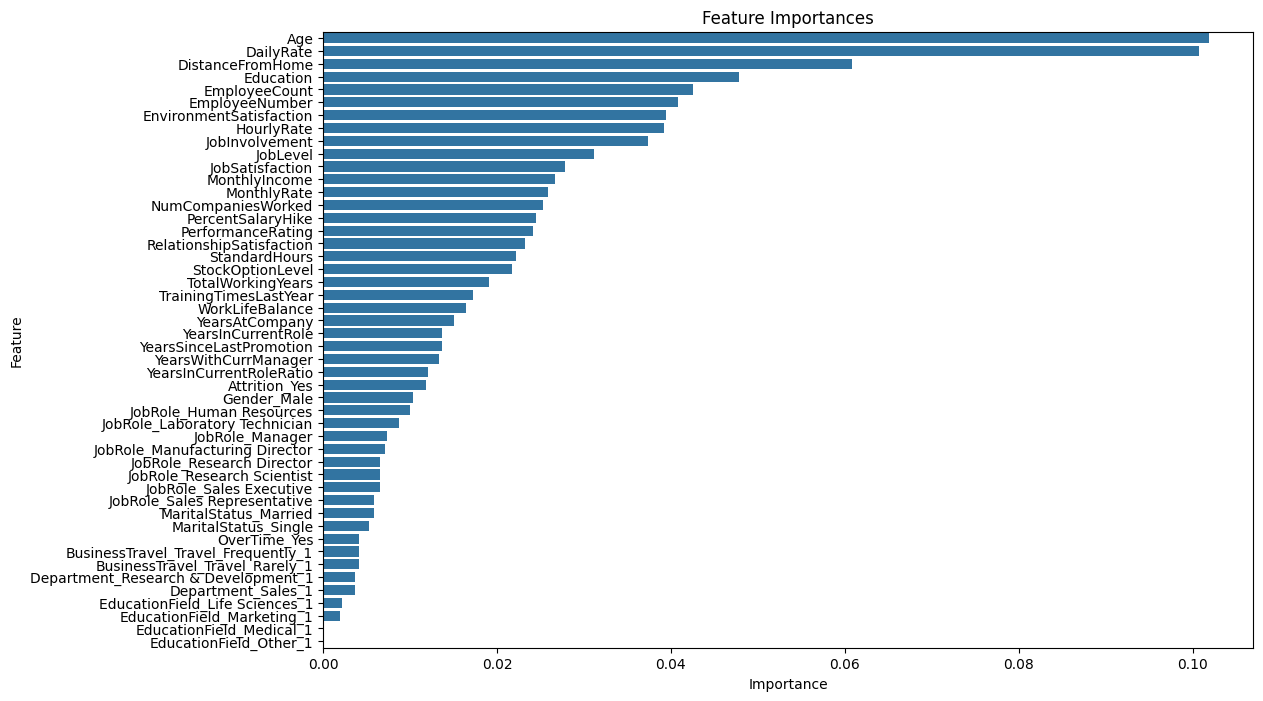

In [11]:
# Plot a seaborn barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming the last column is 'Attrition'
X = df_transformed.iloc[:, :-1]  # Features
y = df_transformed.iloc[:, -1]   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with imputation and Logistic Regression
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9931972789115646
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       263
         1.0       1.00      0.94      0.97        31

    accuracy                           0.99       294
   macro avg       1.00      0.97      0.98       294
weighted avg       0.99      0.99      0.99       294



In [13]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming the last column is 'Attrition'
X = df_transformed.iloc[:, :-1]  # Features
y = df_transformed.iloc[:, -1]   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with imputation and Support Vector Machine (SVM)
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', SVC(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8945578231292517
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       263
         1.0       0.00      0.00      0.00        31

    accuracy                           0.89       294
   macro avg       0.45      0.50      0.47       294
weighted avg       0.80      0.89      0.84       294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


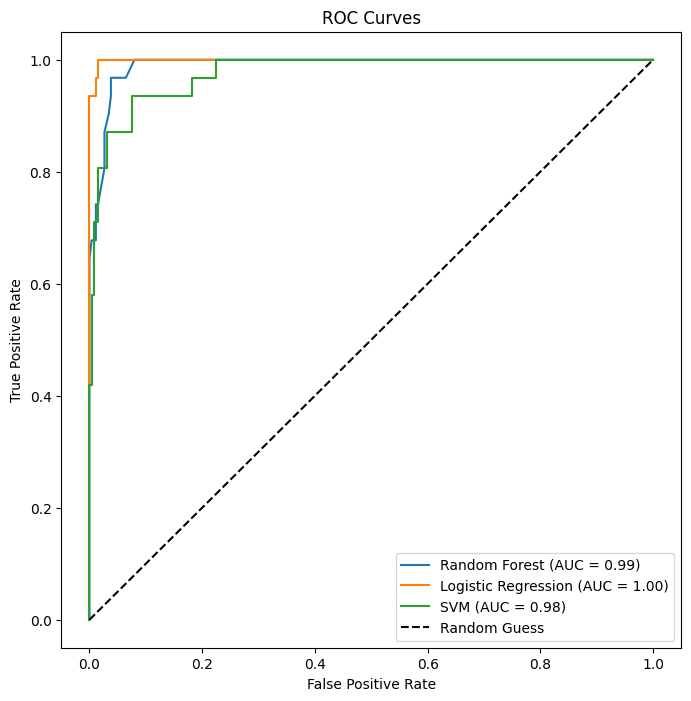

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming the last column is 'Attrition'
X = df_transformed.iloc[:, :-1]  # Features
y = df_transformed.iloc[:, -1]   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines with imputation and different classifiers
rf_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

logreg_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', LogisticRegression(random_state=42))
])

svm_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', SVC(random_state=42, probability=True))  # Need probability estimates for ROC-AUC
])

# Fit the models
rf_pipeline.fit(X_train, y_train)
logreg_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_logreg = logreg_pipeline.predict(X_test)
y_pred_svm = svm_pipeline.predict(X_test)

# Get predicted probabilities for ROC-AUC
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]
y_prob_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]
y_prob_svm = svm_pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC scores
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plot ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()
